# Backtesting Portfolios

In [175]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

Below:
#### NAMES: Tickers for each stock in the portfolio
#### SHARES: The number of shares corresponding to each ticker
#### INDICIES: The indicies you want to compare it to

In [176]:
#Indicies 
NAMES = ['MSFT','DIS','SPY']
SHARES = [1,5,1]
INDICIES = ["SPY"]

Automatically calculates the number of stocks are in the portfolio, to allow normalisation

In [177]:
NUM_SHARES_PORTFOLIO = 0
for i in range(len(SHARES)):
    NUM_SHARES_PORTFOLIO += SHARES[i]

In [178]:
#Create a list of tickers
share_list = []

for i in range(len(NAMES)):
    share_list.append(yf.Ticker(NAMES[i]))

indicies_list= []
for i in range(len(INDICIES)):
    indicies_list.append(yf.Ticker(INDICIES[i]))

In the next two, history_shares and history_indicies contain the previous share prices for the last 5 years for stocks and indicies

In [179]:
history_shares = []
for ticker in share_list:
    history_shares.append(ticker.history(period='5y'))

In [180]:
history_indicies = []
for ticker in indicies_list:
    history_indicies.append(ticker.history(period='5y'))

The below cell creates a normalised column in history array for each stock, using the price at t = 0 (actually t = 1 in this case due to the nature of the dataframe)

In [181]:
for i in range(len(history_shares)):
    history_shares[i]['Normalised'] = history_shares[i]['Open']/history_shares[i]['Open'].iloc[1]
for i in range(len(history_indicies)):
    history_indicies[i]['Normalised'] = history_indicies[i]['Open']/history_indicies[i]['Open'].iloc[1]

Plotting each of the shares in your portfolio normalised

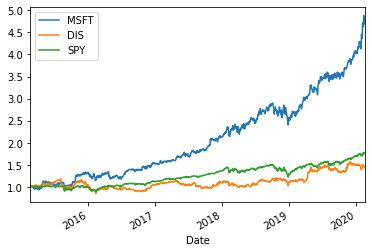

In [182]:
for i in range(len(history_shares)):
    history_shares[i]['Normalised'].plot(label = NAMES[i])
plt.legend()
plt.show()

This cell is just showing the sheer amount of data available for analytics, for further analysis.

In [183]:
share_list[0].info

{'zip': '98052',
 'sector': 'Technology',
 'fullTimeEmployees': 144000,
 'longBusinessSummary': "Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. The company's Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); and Skype, Outlook.com, and OneDrive. It also provides LinkedIn that includes Talent and marketing solutions, and subscriptions; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. The company's Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also provides support services and Microsoft 

Create a potfolio dataframe and plot it against your indicies, allowing you to see performance against a benchmark.

In [170]:
Portfolio = pd.DataFrame()
#Portfolio['Value'] = history[0]['Open'] * 1 + history[1]['Open'] * 1
#print(len(history_shares))
for i in range(len(history_shares)):
    if i == 0:
        Portfolio['Value'] = history_shares[0]['Normalised'] * SHARES[i]
    else:
        Portfolio['Value'] = Portfolio['Value'] + history_shares[i]['Normalised']* SHARES[i]
Portfolio['Value'] = Portfolio['Value'] / NUM_SHARES_PORTFOLIO


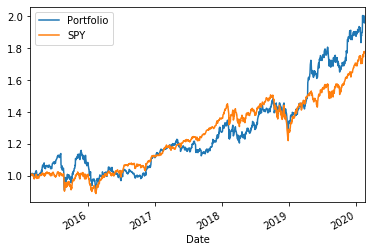

In [171]:
Portfolio['Value'].plot(label = 'Portfolio')
for i in range(len(history_indicies)):
    history_indicies[i]['Normalised'].plot(label = INDICIES[i])
plt.legend()
plt.show()